## SNetT mreža-analiza ##

In [1]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import numpy as np
import pickle

In [3]:
input_path = "models/undirected_count_aggregationSNet_T.gml" 

GSNet = nx.Graph(nx.read_gml(input_path)) 

In [3]:
GSNet.nodes()

NodeView(('philosophy', 'business', 'obama', 'nsfw', 'ideas', 'netsec', 'pics', 'funny', 'joel', 'worldnews', 'photography', 'videos', 'gadgets', 'atheism', 'entertainment', 'AskReddit', 'software', 'guns', 'Health', 'linux', 'geek', 'cogsci', 'WTF', 'offbeat', 'gaming', 'science', 'math', 'scifi', 'environment', 'Economics', 'technology', 'history', 'news', 'comics', 'programming', 'bestof', 'politics', 'canada', 'reddit.com'))

In [4]:
print(len(GSNet))

39


In [6]:
print(len(GSNet.edges()))

741


## Gustina mreže ##

In [5]:
print(nx.density(GSNet))  #741/(39*38/2)     maxM=n*(n-1)/2

1.0


## Dijametar mreže ##

In [8]:
print(nx.diameter(GSNet))

1


## Prosečna distanca 

In [9]:
print(nx.average_shortest_path_length(GSNet))

1.0


## Povezane komponente grafa SNet ##

In [7]:
print(nx.is_connected(GSNet))

True


In [10]:
component_size_list=[len(c) for c in sorted(nx.connected_components(GSNet), key=len, reverse=True)]
print(f'Broj povezanih komponenti:'+str(len(component_size_list)))
print(f'Lista povezanih komponenti:')
print(component_size_list)

Broj povezanih komponenti:1
Lista povezanih komponenti:
[39]


## Dominantna komponenta ##

In [13]:
dominant_cc=max(nx.connected_components(GSNet), key=len)
Gdom=GSNet.subgraph(dominant_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} cvorova i {len(Gdom.edges())} grana")
dom_path="models/dominantna_komponentaT.gml"
nx.write_gml(Gdom, dom_path)

Dominantna komponenta ima 39 cvorova i 741 grana


## Koeficijent klasterisanja ##

In [4]:
subredit, clustering_coef=zip(*nx.clustering(GSNet, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit, clustering_coef) if cc>0]

dataFrameClu=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu.sort_values('clustering coeficient', inplace=True)

In [5]:
prosecni_stepen_klasterisanja=nx.average_clustering(GSNet)
print(f'Prosečan stepen klasterisanja:{prosecni_stepen_klasterisanja}')
print('Lokalni stepeni klasterisanja:')
print(dataFrameClu)

Prosečan stepen klasterisanja:1.0
Lokalni stepeni klasterisanja:
        subreddit  clustering coeficient
4           ideas               0.005999
8            joel               0.006265
17           guns               0.013363
16       software               0.013873
10    photography               0.019924
37         canada               0.019926
31        history               0.021185
5          netsec               0.025915
0      philosophy               0.026819
26           math               0.026993
21         cogsci               0.030314
27          scifi               0.032450
18         Health               0.032719
19          linux               0.037478
32           news               0.038430
35         bestof               0.039135
2           obama               0.047837
20           geek               0.054825
12        gadgets               0.057668
28    environment               0.058090
3            nsfw               0.058102
11         videos               0

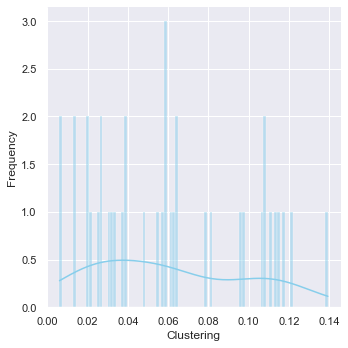

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
ax=sns.displot(dataFrameClu['clustering coeficient'],
              bins=100,
              kde=True,
              color='skyblue')
ax.set(xlabel='Clustering', ylabel='Frequency')

In [16]:
print(f'Maksimalni stepen klasterisanja:')
print(dataFrameClu.sort_values('clustering coeficient', ascending=False).head(1))

Maksimalni stepen klasterisanja:
     subreddit  clustering coeficient
38  reddit.com               0.139332


In [17]:
print(f'Globalni koeficijent klasterisanja:')
print(nx.transitivity(GSNet))

Globalni koeficijent klasterisanja:
1.0


### Upoređivanje sa ER mrežom ###

In [18]:
n=GSNet.number_of_nodes()
m=GSNet.number_of_edges()

In [19]:
p=(2*float(m))/(n*(n-1))  #p=2*m/(n*(n-1)), p je verovatnoca formiranja grane takva da je ocekivani broj grana m
print(p)
er=nx.erdos_renyi_graph(n,p)
delta_m=m-er.number_of_edges()
print(f"Broj grana originalne mreže minus broj grana u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

1.0
Broj grana originalne mreže minus broj grana u ER mreži iznosi 0, što je odstupanje od 0.0%


In [20]:
subredit1, clustering_coef1=zip(*nx.clustering(er, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit1, clustering_coef1) if cc>0]

dataFrameClu1=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu1.sort_values('clustering coeficient', inplace=True)
prosecni_stepen_klasterisanja1=nx.average_clustering(er)
print(f'Prosečan stepen klasterisanja ER mreže:{prosecni_stepen_klasterisanja1}')
print('Lokalni stepeni klasterisanja ER mreže:')
print(dataFrameClu1)
print(f'Maksimalni stepen klasterisanja ER mreže:')
print(dataFrameClu1.sort_values('clustering coeficient', ascending=False).head(1))
print(f'Globalni koeficijent klasterisanja ER mreže:')
print(nx.transitivity(er))

Prosečan stepen klasterisanja ER mreže:1.0
Lokalni stepeni klasterisanja ER mreže:
    subreddit  clustering coeficient
0           0                    1.0
21         21                    1.0
22         22                    1.0
23         23                    1.0
24         24                    1.0
25         25                    1.0
26         26                    1.0
27         27                    1.0
20         20                    1.0
28         28                    1.0
30         30                    1.0
31         31                    1.0
32         32                    1.0
33         33                    1.0
34         34                    1.0
35         35                    1.0
36         36                    1.0
29         29                    1.0
37         37                    1.0
19         19                    1.0
17         17                    1.0
1           1                    1.0
2           2                    1.0
3           3                

In [21]:
er_gcc=nx.transitivity(er)
gcc=nx.transitivity(GSNet)

In [22]:
tabela=pd.DataFrame([(prosecni_stepen_klasterisanja, prosecni_stepen_klasterisanja1,
                     max(clustering_coef),
                     max(clustering_coef1), gcc, er_gcc)],
                    columns=['ACC','ACC-ER','LCC','LCC-ER','GCC','GCC-ER'])
print(tabela)

   ACC  ACC-ER       LCC  LCC-ER  GCC  GCC-ER
0  1.0     1.0  0.139332     1.0  1.0     1.0


In [23]:
print(nx.diameter(er))  #ovde je manji dijametar nego kod realne mreze, tu detektujemo da je mali svet

1


In [24]:
print(nx.average_shortest_path_length(er))

1.0


## Fenomen malog sveta

In [25]:
import numpy as np

Za fenomen malog sveta realne mreže, potrebno je da budu zadovoljeni uslovi:
1. mala prosečna distanca dva čvora u mreži u odnosu na veličinu mreže: lnetwork~ln(n)/ln(d)
2. visoki globalni koeficijent klasterisanja u odnosu na globalni koeficijent klasterisanja kod ER mreže: Cn>>Cer

In [26]:
lnN=np.log(len(GSNet.nodes()))
print(lnN)
d=len(GSNet.edges())/len(GSNet.nodes())
lnd=np.log(d)
print(lnd)
print(lnN/lnd) 

3.6635616461296463
2.9444389791664403
1.2442307930479806


Prosečna udaljenost bilo koja dva čvora u mreži SNetT je 1 (nije približna vrednosti 1.2442307930479806), a globalni stepen klasterizacije je 1, što je isto kao kod globalnog koeficijenta klasterizacije ER mreže (1), to nije ostvaren fenomen malog sveta.

## Asortativnost

In [27]:
r1=nx.degree_assortativity_coefficient(GSNet)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}") #radi

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: nan


C:\Users\Sandra\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


Izvršavanjem ovog koda treba da se prikaže -0.13602861 (kod kolege)

Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

In [ ]:
r2=nx.degree_assortativity_coefficient(GSNet, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}") #zasto prijavljuje gresku

Izvršavanjem ovog koda treba da se prikaže 0.001904985 (kod kolege)

Mreža je neutralno asortativna, ne zna se da li čvorovi imaju tendenciju da se vezuju sa čvorovima sličnog stepena.

## Fenomen kluba bogatih

In [ ]:
rich_club_coef=nx.rich_club_coefficient(GSNet)

Čvorovi nemaju tendenciju da se vezuju međusobno, pogotovo da ne mogu da se vezuju sa čvorovima većeg stepena, jer smo zaključili da je mreža disasortitvna.

## Power-law distribucija 

In [30]:
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees) #raspakovanje
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())     #x-stepen, y-broj cvorova koji imaju odredjeni stepen                                                 

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({19463: 1, 152511: 1, 49139: 1, 66590: 1, 2008: 1, 18683: 1, 208762: 1, 199788: 1, 2333: 1, 183265: 1, 12384: 1, 66276: 1, 64635: 1, 77331: 1, 178636: 1, 72079: 1, 7172: 1, 6774: 1, 26541: 1, 33126: 1, 59185: 1, 23421: 1, 181160: 1, 111332: 1, 107444: 1, 196232: 1, 19784: 1, 26082: 1, 65407: 1, 71074: 1, 188881: 1, 13599: 1, 34029: 1, 75765: 1, 155599: 1, 34926: 1, 223813: 1, 12539: 1, 281048: 1})


<ipython-input-30-4d8ae1fdee0e>:25: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(1, max(y))


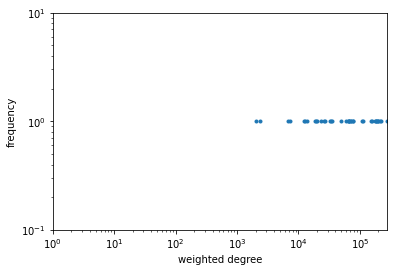

In [31]:
plot_deg_frequency(GSNet, True)

Navedena distribucija čvorova po težinskom stepenu ne prati power-law raspodelu, jer svi čvorovi imaju veliki broj veza (vidimo da ima po jedan čvor kod većih stepena).

## Habovi i autoriteti

In [7]:
#hubs_authorities=nx.hits(G) #SNet mreza je neusmerena, pa ne mogu se odrediti habovi i autoriteti

## Analiza mera centralnosti ##

1) Centralnosti po stepenu, bliskosti, relacionoj centralnosti 2) Centralnosti po sopstvenom vektoru

In [32]:
DC_dict=nx.degree_centrality(GSNet)

In [33]:
CC_dict=nx.closeness_centrality(GSNet)

In [34]:
BC_dict=nx.betweenness_centrality(GSNet) 

In [35]:
EVC_dict = nx.eigenvector_centrality(GSNet)

In [36]:
df1=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
df2=pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
df3=pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
df4=pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
df=pd.concat([df1, df2, df3, df4], axis=1)
print(df)

                DC   CC   BC       EVC
philosophy     1.0  1.0  0.0  0.160128
business       1.0  1.0  0.0  0.160128
obama          1.0  1.0  0.0  0.160128
nsfw           1.0  1.0  0.0  0.160128
ideas          1.0  1.0  0.0  0.160128
netsec         1.0  1.0  0.0  0.160128
pics           1.0  1.0  0.0  0.160128
funny          1.0  1.0  0.0  0.160128
joel           1.0  1.0  0.0  0.160128
worldnews      1.0  1.0  0.0  0.160128
photography    1.0  1.0  0.0  0.160128
videos         1.0  1.0  0.0  0.160128
gadgets        1.0  1.0  0.0  0.160128
atheism        1.0  1.0  0.0  0.160128
entertainment  1.0  1.0  0.0  0.160128
AskReddit      1.0  1.0  0.0  0.160128
software       1.0  1.0  0.0  0.160128
guns           1.0  1.0  0.0  0.160128
Health         1.0  1.0  0.0  0.160128
linux          1.0  1.0  0.0  0.160128
geek           1.0  1.0  0.0  0.160128
cogsci         1.0  1.0  0.0  0.160128
WTF            1.0  1.0  0.0  0.160128
offbeat        1.0  1.0  0.0  0.160128
gaming         1.0  1.0  

Svaki čvor u tom grafu je povezan svaki sa svakim, zato su iste vrednosti.

In [39]:
with open("data1/snetT-centralities", 'wb') as file:
    pickle.dump(df, file)

### Centralnost po stepenu ###

In [40]:
df_dc = pd.DataFrame({'DC':df['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10))

              DC
philosophy   1.0
Economics    1.0
WTF          1.0
offbeat      1.0
gaming       1.0
science      1.0
math         1.0
scifi        1.0
environment  1.0
technology   1.0


### Centralnost po bliskosti ###

In [41]:
df_cc = pd.DataFrame({'CC':df['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10))

              CC
philosophy   1.0
Economics    1.0
WTF          1.0
offbeat      1.0
gaming       1.0
science      1.0
math         1.0
scifi        1.0
environment  1.0
technology   1.0


### Relaciona centralnost ###

In [42]:
df_bc = pd.DataFrame({'BC':df['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10))

              BC
philosophy   0.0
Economics    0.0
WTF          0.0
offbeat      0.0
gaming       0.0
science      0.0
math         0.0
scifi        0.0
environment  0.0
technology   0.0


### Centralnost po sopstvenom vektoru ###

In [43]:
df_ec = pd.DataFrame({'EVC':df['EVC']})
df_ec.sort_values(by='EVC', ascending=False, inplace = True)
print(df_ec.head(10))

                  EVC
philosophy   0.160128
Economics    0.160128
WTF          0.160128
offbeat      0.160128
gaming       0.160128
science      0.160128
math         0.160128
scifi        0.160128
environment  0.160128
technology   0.160128


In [90]:
with open("data1/snetT-centralities", 'rb') as file:
    df = pickle.load(file)

### Kacova centralnost ###

In [91]:
import pickle
with open("data1/katz_b=1000-SNetT", 'rb') as file:
    df_katz = pickle.load(file)

In [92]:
print(df_katz.sort_values(by='EVC', ascending=False).head(10))

                    EVC  EVC_rank
reddit.com     0.377168       1.0
politics       0.311808       2.0
pics           0.289432       3.0
funny          0.278483       4.0
science        0.272313       5.0
technology     0.264291       6.0
worldnews      0.257809       7.0
WTF            0.252938       8.0
entertainment  0.252294       9.0
programming    0.221821      10.0


## Korelacija metrika centralnosti ##

In [94]:
df_correlation=pd.merge(df, df_katz, left_index=True, right_index=True)
df_correlation.rename(columns = {'EVC_x':'EVC', 'EVC_y':'KatzC'}, inplace = True)
df_correlation=df_correlation.drop(['EVC_rank'], axis=1)
print(df_correlation)

                DC   CC   BC       EVC     KatzC
philosophy     1.0  1.0  0.0  0.160128  0.036080
business       1.0  1.0  0.0  0.160128  0.219808
obama          1.0  1.0  0.0  0.160128  0.075925
nsfw           1.0  1.0  0.0  0.160128  0.098561
ideas          1.0  1.0  0.0  0.160128  0.016485
netsec         1.0  1.0  0.0  0.160128  0.036034
pics           1.0  1.0  0.0  0.160128  0.289432
funny          1.0  1.0  0.0  0.160128  0.278483
joel           1.0  1.0  0.0  0.160128  0.017353
worldnews      1.0  1.0  0.0  0.160128  0.257809
photography    1.0  1.0  0.0  0.160128  0.028332
videos         1.0  1.0  0.0  0.160128  0.095120
gadgets        1.0  1.0  0.0  0.160128  0.093215
atheism        1.0  1.0  0.0  0.160128  0.112024
entertainment  1.0  1.0  0.0  0.160128  0.252294
AskReddit      1.0  1.0  0.0  0.160128  0.100774
software       1.0  1.0  0.0  0.160128  0.022173
guns           1.0  1.0  0.0  0.160128  0.021974
Health         1.0  1.0  0.0  0.160128  0.044690
linux          1.0  

In [ ]:
labele=['DC','CC','BC', 'EVC', 'KatzC']
matrica_korelacije=pd.DataFrame(columns=['DC','CC','BC','EVC', 'KatzC'], index=['DC','CC','BC','EVC','KatzC'])
p_val_matrica=pd.DataFrame(columns=['DC','CC','BC','EVC', 'KatzC'], index=['DC','CC','BC','EVC','KatzC'])

for i in labele:
    for j in labele:
        matrica_korelacije[i][j], p_val_matrica[i][j]=stats.kendalltau(df_correlation[i], df_correlation[j])
        
print(matrica_korelacije)
print(p_val_matrica) 

Jer se vrednosti svakog sabredita za svaku centralnost ne menja.

## Kompozitna mera centralnosti ##

In [95]:
df_ = df_correlation
for metric in labele:
    df_[f"{metric}_rank"] = df_correlation[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']* df_['KatzC_rank'] #composite_rank=dc_rank*cc_rank*bc_rank*evc_rank*katz_rank

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                DC   CC   BC       EVC     KatzC  DC_rank  CC_rank  BC_rank  \
reddit.com     1.0  1.0  0.0  0.160128  0.377168     20.0     20.0     20.0   
politics       1.0  1.0  0.0  0.160128  0.311808     20.0     20.0     20.0   
pics           1.0  1.0  0.0  0.160128  0.289432     20.0     20.0     20.0   
funny          1.0  1.0  0.0  0.160128  0.278483     20.0     20.0     20.0   
science        1.0  1.0  0.0  0.160128  0.272313     20.0     20.0     20.0   
technology     1.0  1.0  0.0  0.160128  0.264291     20.0     20.0     20.0   
worldnews      1.0  1.0  0.0  0.160128  0.257809     20.0     20.0     20.0   
WTF            1.0  1.0  0.0  0.160128  0.252938     20.0     20.0     20.0   
entertainment  1.0  1.0  0.0  0.160128  0.252294     20.0     20.0     20.0   
programming    1.0  1.0  0.0  0.160128  0.221821     20.0     20.0     20.0   

               EVC_rank  KatzC_rank  composite_rank  
reddit.com         20.0         1.0        160000.0  
politics           20.

## Detekcija komuna ##

### Hijerarhijsko klasterisanje

In [50]:
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [51]:
comp=nx.community.girvan_newman(GSNet)
k=15
hierarchical_decomposition={}
i=2
for communities in itertools.islice(comp, k):
    hierarchical_decomposition[i]=tuple(sorted(c) for c in communities)
    i=i+1

In [52]:
def print_decomposition(hierarchy, num_clusters):
    decomposition_tupple = hierarchy[num_clusters]
    print(f"Dekompozicija na {num_clusters} komuna")
    for com_ind in range(num_clusters):
        print(f"Komuna {com_ind+1} ima {len(decomposition_tupple[com_ind])} clanova")
        print(decomposition_tupple[com_ind])
        print("-----------------------------------------------------------------------")

In [53]:
print_decomposition(hierarchical_decomposition, 3)

Dekompozicija na 3 komuna
Komuna 1 ima 1 clanova
['philosophy']
-----------------------------------------------------------------------
Komuna 2 ima 1 clanova
['business']
-----------------------------------------------------------------------
Komuna 3 ima 37 clanova
['AskReddit', 'Economics', 'Health', 'WTF', 'atheism', 'bestof', 'canada', 'cogsci', 'comics', 'entertainment', 'environment', 'funny', 'gadgets', 'gaming', 'geek', 'guns', 'history', 'ideas', 'joel', 'linux', 'math', 'netsec', 'news', 'nsfw', 'obama', 'offbeat', 'photography', 'pics', 'politics', 'programming', 'reddit.com', 'science', 'scifi', 'software', 'technology', 'videos', 'worldnews']
-----------------------------------------------------------------------


In [54]:
print_decomposition(hierarchical_decomposition, 5)

Dekompozicija na 5 komuna
Komuna 1 ima 1 clanova
['philosophy']
-----------------------------------------------------------------------
Komuna 2 ima 1 clanova
['business']
-----------------------------------------------------------------------
Komuna 3 ima 1 clanova
['obama']
-----------------------------------------------------------------------
Komuna 4 ima 1 clanova
['nsfw']
-----------------------------------------------------------------------
Komuna 5 ima 35 clanova
['AskReddit', 'Economics', 'Health', 'WTF', 'atheism', 'bestof', 'canada', 'cogsci', 'comics', 'entertainment', 'environment', 'funny', 'gadgets', 'gaming', 'geek', 'guns', 'history', 'ideas', 'joel', 'linux', 'math', 'netsec', 'news', 'offbeat', 'photography', 'pics', 'politics', 'programming', 'reddit.com', 'science', 'scifi', 'software', 'technology', 'videos', 'worldnews']
-----------------------------------------------------------------------


In [55]:
def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogramSNetT.png')

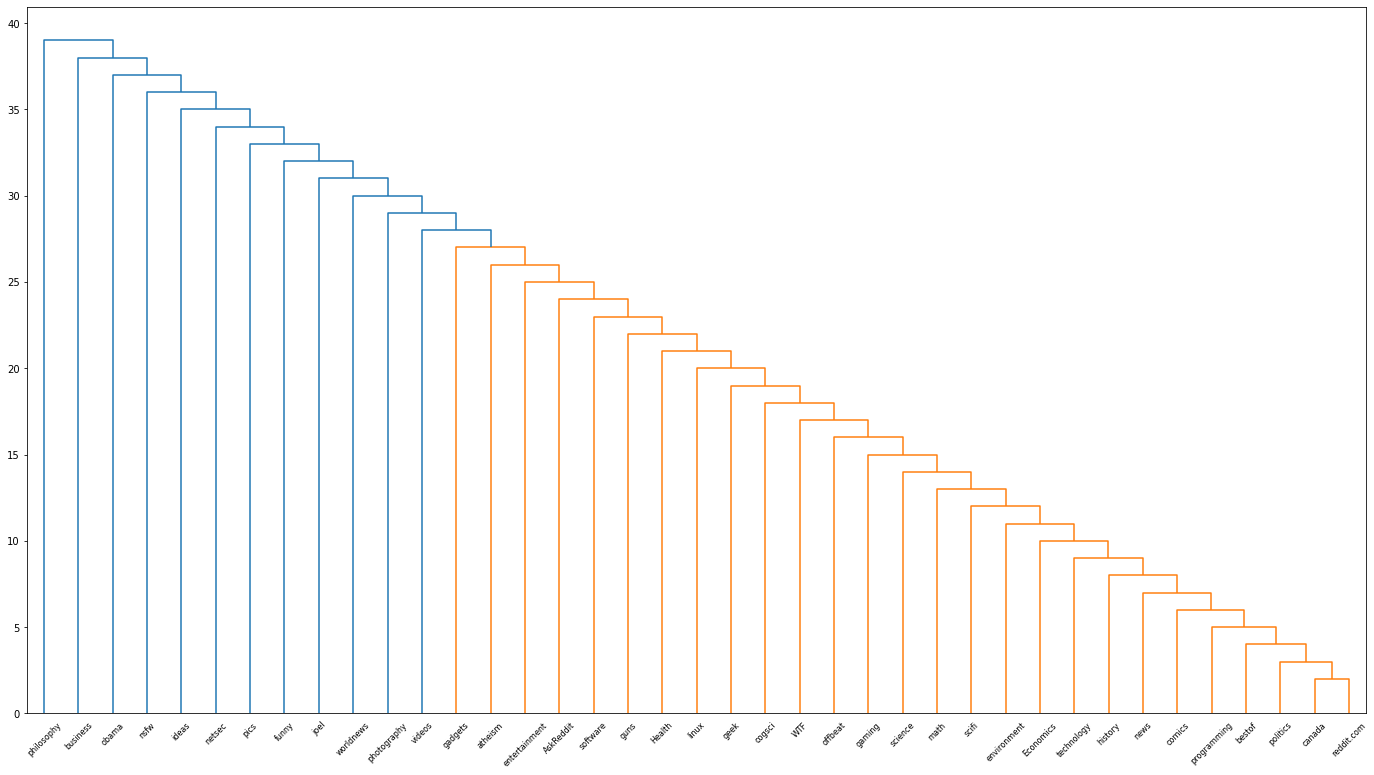

In [56]:
plot_and_save_dendrogram(GSNet)

## Spektralno klasterisanje

In [17]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
#from docx import Document
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [11]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}.svg")
    plt.show() 

In [12]:
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

In [13]:
def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

In [ ]:

# read the multigraph
#G = GSNet
# create weighted graph G2 from multigraph G
G2 = nx.Graph()
for u,v,data in GSNet.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G2.has_edge(u,v):
        G2[u][v]['weight'] += w
    else:
        G2.add_edge(u, v, weight=w)

zaposleni_multigraf = set(G2.nodes)

print("Izolovani cvorovi:")
for z in GSNet.nodes:
    if z not in zaposleni_multigraf:
        G2.add_node(z)
        print(z)


#print(G2.edges(data=True))

#nx.write_pajek(G2, "etf/agregirano_etf.net")
# [(1, 2, {'weight': 26}), (2, 3, {'weight': 42})]

In [ ]:

L = nx.laplacian_matrix(G2).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

#doc = Document()
#doc = docx.Document('tabela_eig.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])
#doc.save('etf/tabela_eig.docx')




plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

In [ ]:
# prvih 30 sopstvenih vrednosti

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')


In [ ]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')

In [ ]:
def get_components2(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    #print("EVM:")
    #EV_mat = np.array(list(eigenspace0_basis)).T
    #print(pd.DataFrame(EV_mat))
    
    IV_rref, _ = sympy.Matrix(eigenspace0_basis).rref()
    print(IV_rref)
    
    
    # transformation into indicator vectors
    #indicator_vector_container = []
    #for eigenvector in eigenspace0_basis:
        
    #    max_component = max([abs(c) for c in eigenvector])
    #    indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
    #    indicator_vector_container.append(indicator_vector)
    
    #print("Indicator vector matrix:")
    IV_mat = np.array(IV_rref).T
    #print(pd.DataFrame(IV_mat))
        
    components = []
    IV_rref = np.array(IV_rref)
    for iv in IV_rref:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components

In [20]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

def get_components(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 


    print("EVM:")
    EV_mat = np.array(list(eigenspace0_basis)).T
    print(pd.DataFrame(EV_mat))
    
    # transformation into indicator vectors
    indicator_vector_container = []
    for eigenvector in eigenspace0_basis:
        
        max_component = max([abs(c) for c in eigenvector])
        indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
        indicator_vector_container.append(indicator_vector)
    
    print("Indicator vector matrix:")
    IV_mat = np.array(indicator_vector_container).T
    print(pd.DataFrame(IV_mat))
        
    components = []
    for iv in indicator_vector_container:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components


In [ ]:
#test
W = [[0,0,0,0,0,0], [0,0,1,0,0,0,], [0,1,0,0,0,0,], [0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
D = np.diag([0,1,1,2,2,2])
Test_L = D - np.array(W)
get_components3(Test_L,3)

In [ ]:
# partition G2 to components
components = get_components3(L, 21)

#print(components)
component_sizes = [len(c) for c in components]
print(component_sizes)
print(sum(component_sizes))
zipped = list(zip(component_sizes, components)) # pair component sizes and components
zipped.sort(key=lambda tup: tup[0], reverse = True) # sort pairs by component size
component_sizes, components = zip(*zipped) 
#print(component_sizes)
#print(sum(component_sizes))

dominant_component_indexes = components[0]

dominant_component_labels = []
for i, label in enumerate(list(G2.nodes())):
    if i in dominant_component_indexes:
        dominant_component_labels.append(label)

#print(dominant_component_indexes)
#print(dominant_component_labels)

In [ ]:
dominant_component = G2.subgraph(dominant_component_labels)
for k in range(2, 30):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    nx.write_gml(G, f"etf/spectral/spectral{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes.astype(int)}")

## Louvain metod

Svi čvorovi SNetT grane su unutar jedne komune. Bilo kakvim povećavanjem rezolucije, modularnost ostaje ista, a broj komuna je 1, a veličina je 39 čvorova.

## Mostovi

In [57]:
mostovi=nx.bridges(GSNet)
mostovi=list(mostovi)
print(mostovi)

[]


Nema mostova.